## Lab 4: Site Mapping for Your Final Project Region

In Lab 4, you're tasked with creating a comprehensive site map for the geographic region you've chosen for your final project. Utilizing the Python programming language within a Jupyter Notebook environment, and with the aid of the Folium library, you will construct a detailed, informative, and visually striking map. Your map will be informed by data from the GEBCO dataset, which will aid in a deep understanding of both bathymetry and land terrain in your selected region.

### Learning Outcomes

Upon successful completion of this lab, you will have the skills to:

- **Import Python Libraries**: Identify and import necessary Python libraries that will be used in the mapping process.
- **Function Definition and Application**: Write Python functions to perform specific tasks and apply these functions effectively in your mapping.
- **GEBCO Data Handling**: Retrieve GEBCO dataset from its repository and manipulate it to suit the needs of your geographic mapping.
- **Map Customization**: Modify and enhance your map to meet the specific requirements of your final project, ensuring it is both informative and aesthetically pleasing.
- **Bathymetric Data Interpretation**: Interpret GEBCO's gridded bathymetric data to accurately represent oceanic and landforms.

### Introduction to Lab and GEBCO Data

This lab introduces you to the indispensable GEBCO **Global ocean & land terrain models**, necessary for the creation of precise and comprehensive maps. The GEBCO_2023 Grid, which you will be using, offers a detailed global terrain model covering both ocean and land with elevation data in meters at a 15 arc-second interval grid.

A notable feature of the GEBCO dataset is the Type Identifier (TID) Grid, which gives insights into the types of source data used for the main grid. This is particularly useful for mapping complex regions, such as areas with under-ice topographies in Greenland and Antarctica.

Get ready to put your mapping skills into practice for your final project as we delve into GEBCO data and learn to harness the power of the Folium library in this lab.

Let's get started with Lab 4 and create a standout site map for your project region!


## Step 1: Designing an Advanced Study Area Map

Building on the skills developed earlier, this step involves creating a more advanced map for your final project study area. As you work towards your final project, you may find yourself assessing the myriad effects of climate change on particular regions.

To effectively communicate these complexities in oceanographic and environmental studies, a well-structured map is crucial. Such maps provide the foundation for reports and presentations, offering a visual context to the discussed issues.

Thankfully, with Python, you don't need to rely on expensive GIS software like ArcGIS. The Python ecosystem presents a wealth of geospatial tools and libraries that allow you to create and tailor maps to your specific needs.

It's time to focus on designing a map that centers around your final project study area, demonstrating a rectangular study area. This exercise will equip you with the skills to produce an impactful map for your final project, potentially concerning a region similarly affected by climate change. You will be required to map your study area using tools like Google Maps or Google Earth to investigate your chosen final project area. Consider the extent of the region that will most effectively aid your final project's narrative and the impacts of climate change on this area. For instance, if your project discusses the effects on a particular metropolitan area or coral reef, ensure that the chosen region is not too expansive. Conversely, it should be focused enough to permit visibility of specific features pertinent to your final project.

## Step 2: Defining Your Final Project Study Area and Marker

With an understanding of the importance of a well-defined study area, you are now set to delineate the bounds of your selected region.

The coordinates `('north', 'south', 'east', 'west')` represent the northernmost latitude, southernmost latitude, easternmost longitude, and westernmost longitude of your study area, respectively. Replace these placeholders with the boundary coordinates of your study area. These figures will establish a rectangular perimeter framing the scope of your study area on the map.

Additionally, choose a significant point within your study area, such as a city or island, to serve as a marker point. Provide the coordinates for this marker, which will be used in your map to draw attention to this specific location.

In [ ]:
# Define the latitude and longitude boundaries for the study area and the marker location
north, south, east, west = 26, 25, -80, -81  # Example coordinates, replace with your own

# Define the text variable for the marker name
markername = 'Miami, FL'
marker_coords = (25.7617, -80.1918)  # Example coordinates, replace with your own

### Remember to replace <your_north_bound>, <your_south_bound>, <your_east_bound>, and <your_west_bound> with the actual coordinates for your study area, and <your_marker_latitude>, <your_marker_longitude> with the coordinates of your chosen marker location.

Now, run the script below to generate a map for your region - adjust the parameters accordingly until you are happy with the map's extents.

In [ ]:
# Import required libraries
import folium
from folium.plugins import FastMarkerCluster, MeasureControl
from folium import plugins

# Create a map centered around Miami with slightly zoomed out view
m = folium.Map(location=marker_coords, zoom_start=10, tiles="CartoDB positron")  # Adjusted zoom level here

# Add a marker for Miami
folium.Marker(
    marker_coords,
    tooltip=markername,
    icon=folium.Icon(color='blue', icon='cloud')
).add_to(m)

# Define the latitude and longitude boundaries for the pre-defined region
north, south, east, west = 26, 25, -79, -81

# Draw the pre-defined region on the map (with no fill, just an outline)
folium.Rectangle(
    bounds=[[south, west], [north, east]],
    color="#ff7800",
    fill=False  # Removed fill color and opacity to just show the boundary line
).add_to(m)

# Add measure tool to the map, allowing for distance measurement
m.add_child(MeasureControl())

# Add a scale to the map
folium.plugins.MiniMap(toggle_display=True).add_to(m)

# Add a fullscreen button to the map
plugins.Fullscreen(position='topright').add_to(m)

# Add the tile layers
folium.TileLayer('openstreetmap').add_to(m)
folium.TileLayer('cartodb positron').add_to(m)
folium.TileLayer('cartodb dark_matter').add_to(m)
folium.TileLayer('stamenterrain').add_to(m)

# Add layer control to switch between tile layers
folium.LayerControl().add_to(m)

# Display the map
m


## Step 3: Extracting Bathymetry Data from GEBCO for your study area

To review from Lab 3, bathymetry data plays a crucial role in understanding and visualizing the impacts of climate change on coastal regions. By analyzing the seafloor's depth and its features, we can better predict how rising sea levels and increased storm intensity might affect our selected study area. With Miami being a coastal city, it's particularly important to visualize the surrounding underwater topography and grasp the potential risks that climate change may bring. Let's review he process of retrieving this vital data.

---

### **Navigate to GEBCO's Platform**

Visit GEBCO's Gridded Bathymetry Data Download page:
[GEBCO Gridded Bathymetry Data Download](https://www.download.gebco.net).

---

### **Grid Version Selection**

From the "SELECT GRID VERSION" dropdown:
- **Choose**: GEBCO 2023 (or the desired version).

---

### **Grid Boundaries Input**

For your study on the waters surrounding Miami, use the boundaries from your study area (below are the ones from last week that you'll replace with your bounds):
- **Top (Northernmost Latitude)**: 26
- **Right (Easternmost Longitude)**: -79
- **Bottom (Southernmost Latitude)**: 25
- **Left (Westernmost Longitude)**: -81

---

### **Data Formats Selection**

#### **2D netCDF**
- **Selection**: ❌ (Unchecked)
- **Rationale**: `netCDF` format is for multi-dimensional scientific data. Given its complex integration in Python, we'll avoid this format.

#### **GeoTIFF**
- **Selection**: ✅ (Checked)
- **Rationale**: GeoTIFF is preferred due to its wide acceptance in the geospatial community and ease of integration with Python in Jupyter notebooks.

#### **Esri ASCII**
- **Selection**: ❌ (Unchecked)
- **Rationale**: While Esri ASCII is compatible with Python, GeoTIFF remains our primary choice due to its compactness and efficiency.

---

### **Bathy-specific Formats**

Specific options for the bathymetry grid:

#### **Colour Map**
- **Selection**: ❌ (Unchecked)
- **Rationale**: As our focus is on data analysis, visual representation using a color map isn't necessary.

#### **Shaded Relief**
- **Selection**: ❌ (Unchecked)
- **Rationale**: Shaded relief, while providing a 3D visualization, isn't necessary for our current analytical objectives.



## Step 4: Locating and Unzipping the Downloaded GEBCO Data

To utilize the bathymetry data you've downloaded from GEBCO in Google CoLab, follow these instructions:

---

#### **Locate the Downloaded Zip File**

1. Navigate to your default downloads directory or the location where you saved the file.
2. Look for the file named `GEBCO_29_Oct_2023_a9f533f9897e.zip` (the name might vary based on the date and version you downloaded).
a
---

#### **Unzip the GEBCO Data File**

1. Right-click on the zip file `GEBCO_29_Oct_2023_a9f533f9897e.zip`.
2. Choose the option to 'Extract All' or 'Unzip'. The exact wording will depend on your operating system.
3. Select the destination folder or leave it as default. Once extraction is complete, a new folder should appear containing the `.tif` bathymetry file and additional documentation.

---

#### **Uploading the .tif File to Google CoLab**

1. Open your Jupyter notebook on Google CoLab.
2. In the left sidebar of CoLab, click on the folder icon to access the 'Files' section.
3. Click on the 'Upload' button, and a file dialog will open.
4. Navigate to the location where you extracted the GEBCO data and select the `.tif` file, which might be named something like `gebco_2023_n26.0_..._w-81.0_e-79.0.tif`.
5. Wait for the upload to complete. Once done, the `.tif` file will be available for use in your CoLab notebook.

---

Proceed to the next step in the assignment where you'll utilize this bathymetry data for further analysis.


## Step 5: Visualizing the Bathymetry Data Using the `.tif` File

Now that you have successfully uploaded the GEBCO bathymetry data to Google Colab, we will proceed to visualize this data and create a bathymetric map of the chosen geographic region.

---

## Import Necessary Libraries

In this assignment, we aim to create a detailed bathymetric map of our chosen geographic region. Bathymetric maps represent the underwater topography of the ocean floor. To achieve this, we need to work with raster data, which is a pixel-based data structure used to represent spatial information.

One of the most efficient Python libraries for reading and processing raster data is `rasterio`. Here's why we need `rasterio`:

1. **Versatility with Raster Data**: `rasterio` simplifies the process of opening and reading the raster datasets, which are commonly used in bathymetric mapping.
  
2. **Geospatial Analysis**: Beyond just reading, `rasterio` supports various raster operations which are essential for geospatial analysis. This includes tasks like reprojecting and resampling.

3. **Integration with Other Libraries**: It integrates well with other popular Python libraries such as NumPy for data manipulation, making it a suitable choice for our requirements.

4. **Performance**: `rasterio` is built on top of GDAL, ensuring that our raster operations are not only accurate but also efficient.

Before diving into the visualization process, it's crucial to have `rasterio` installed and ready to assist in our bathymetric mapping journey. Let's proceed by importing the necessary Python libraries:



In [ ]:
!pip install rasterio

To create a beautiful site map that integrates the GEBCO bathy data with land boundaries, cities, and other features, you will have to overlay your bathymetric data on top of the existing map you've created using folium. However, folium doesn't support direct integration of raster data (like GEBCO bathy data) out of the box.

A more comprehensive approach involves the use of Geopandas for spatial operations, Rasterio for raster data manipulation, and other libraries like Matplotlib and Contextily to plot and overlay maps.


## Uploading Your Dataset to Google Colab

For this exercise, you will be working with bathymetric data, which is typically provided in the `.tif` format. The dataset we're using comes from GEBCO (General Bathymetric Chart of the Oceans). If you have not already acquired a GEBCO dataset, please download it from their official site.

Once you have your dataset ready, you'll need to upload it to Google Colab to proceed with the next steps in this assignment.

### Steps to Upload Your Dataset:

1. **Access the Files Pane**: On the left side of your Google Colab interface, you'll notice an icon that looks like a folder 📂. This is the "Files" tab. Click on it to access the file system of your current Colab session.

2. **Drag and Drop**: With the "Files" pane open, you can simply drag your `.tif` dataset from your computer and drop it into the pane. This will start the uploading process. Depending on the size of your dataset and your internet speed, this might take a few seconds to a couple of minutes.

3. **Check Upload Status**: Once the upload is complete, you should see your `.tif` file listed in the "Files" pane.

4. **Proceed with the Exercise**: Now that your dataset is uploaded to Google Colab, you can reference it directly by its name in the upcoming code cells. The dataset is temporarily stored in this environment and will be available for the duration of your current session.

> 📌 **Note**: Every time you start a new Google Colab session, you will need to re-upload your dataset, as uploaded files are not persistent across sessions.

Now that your data is in place, let's dive into loading and visualizing it!

---




# Understanding the Raster Data and Defining the Region of Interest

In the following code cell, we will be diving deep into our raster data, specifically the GEBCO bathymetry data, to understand its projection, range, and extent. Understanding the projection and extent of your data is crucial because it ensures that the data aligns correctly on a map. Proper alignment is essential for accurate geographical visualizations and analyses.

Here's a breakdown of what each segment of the code achieves and the expected outputs:

1. **Imports**: We start by importing necessary libraries like `rasterio`, `numpy`, and `geopandas` that will help us manipulate and analyze geospatial data.

2. **Opening and Reading the Raster**: We open the GEBCO data using `rasterio` and read its first band, which contains the bathymetry values. Bathymetry values give us an idea of the underwater topography—think of it like a topographic map, but for underwater features.

3. **Inspecting the Data Range**: We will print the minimum and maximum bathymetry values. This range gives us an idea of the depth variation in the selected region.

4. **Checking for Missing Data**: We compute and print the number of NaN (Not a Number) values in the data. NaN values represent missing data. It's essential to be aware of any missing data as it can impact our analysis.

5. **Extracting the Bounding Box**: We extract the bounding box of the data, which gives us the spatial extent of our raster data—specifically, the westernmost, southernmost, easternmost, and northernmost coordinates.

6. **Defining a Region of Interest**: Using the extracted bounding box, we create a polygon that represents our predefined region of interest. This polygon will help in future steps when we want to focus our analysis or visualization on this specific region.

7. **Creating a GeoDataFrame**: We convert the polygon into a GeoDataFrame, which makes it easier to work with and visualize using other geospatial tools.

8. **Outputs**:
   - A bounding box of the region of interest, which can be visualized on a map to understand the area we're focusing on.
   - The EPSG code (in this case, "EPSG:4326"), which denotes the Coordinate Reference System (CRS) of the raster data. Understanding the CRS is crucial for ensuring our data aligns correctly on a map.

By the end of this code, we'll have a clear understanding of the spatial range and projection of our data, setting the stage for subsequent analyses and visualizations.


In [13]:
import rasterio
import numpy as np
import geopandas as gpd
from shapely.geometry import Polygon

# Open the GEBCO bathymetry data using rasterio - REPLACE THE FILENAME BELOW WITH YOUR FILENAME
with rasterio.open('gebco_2023_n26.0_s25.0_w-81.0_e-79.0.tif') as src:
    bathy_data = src.read(1)
    transform = src.transform
    print(src.bounds)
    extent = [src.bounds.left, src.bounds.right, src.bounds.bottom, src.bounds.top]
    print(bathy_data.min(), bathy_data.max())
    print(np.isnan(bathy_data).sum())  # Number of NaN values

# Extract the bounding box values
west, south, east, north = extent[0], extent[2], extent[1], extent[3]

# Create a polygon of the predefined region using the extracted bounds
polygon = Polygon([(west, south), (west, north), (east, north), (east, south)])

# Create a GeoDataFrame from the polygon
gdf = gpd.GeoDataFrame({'geometry': [polygon]}, crs="EPSG:4326")
print(gdf.total_bounds)
print(src.crs)


BoundingBox(left=-81.0, bottom=25.0, right=-79.0, top=26.000000000000004)
-1577 25
0
[-81.  25. -79.  26.]
EPSG:4326


# Installing Libraries in Google Colab

Google Colab offers a virtual environment where you can run Python code in an isolated workspace. This environment doesn't have every Python package installed by default, so sometimes we need to install additional packages to extend its capabilities. The command `!pip install` is used to install these packages.

- `pip` stands for "Pip Installs Packages" and is a package manager for Python. When you use the `!` before a command in a Colab cell, it tells Colab to execute that command as a shell command (like you would in a terminal).

### `contextily`

- **Overview**: `contextily` is a library to retrieve tile maps from the internet. It allows you to easily add basemaps to your plots. Basemaps provide context for a plot, for instance, showing city names or country borders beneath your geospatial data.

- **Usage in Miami, FL regional site map**: For the Miami regional map (and eventual final project maps), `contextily` can be used to fetch and display a basemap. This basemap will serve as a background layer, providing a geographical context to the plotted data. It can help the viewer to better understand the geographical distribution and relation of the data points.

### `cartopy`

- **Overview**: `cartopy` is a library for cartographic projections and geospatial data visualization. It makes it easy to create maps and plot geospatial data with Python.

- **Usage in Miami, FL regional site map**: `cartopy` will be integral in the creation of the Miami regional map. It provides tools to transform and project your geospatial data, allowing you to visualize data in a way that is appropriate for its spatial distribution. For example, it will help us project our data into the Transverse Mercator CRS, which is suitable for mapping small regions. Additionally, `cartopy` offers various features to enhance our maps, such as adding coastlines, rivers, and political boundaries.

In summary, both these libraries, `contextily` and `cartopy`, will be crucial for enhancing the quality and accuracy of your Miami, FL regional site map and any other geospatial visualizations you'll work on in your final projects.


In [ ]:
!pip install contextily

In [ ]:
!pip install cartopy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 39.9 MB/s eta 0:00:00


# Geospatial Data Visualization of YOUR FINAL PROJECT Region

In the following code cell, we'll be visualizing bathymetric data (depth of underwater features) of a region around your study site. The data comes from the GEBCO dataset and represents the underwater topography of your study area.

### What to Expect:

- **Importing Libraries**: We're using a combination of libraries to handle geospatial data and plotting. This includes `matplotlib`, `rasterio`, and `cartopy`.

- **Data Processing**: We will load the GEBCO bathymetric data using `rasterio`, which allows us to work with geospatial raster data. Once loaded, we'll reproject this data into a Transverse Mercator Coordinate Reference System (CRS). This projection is appropriate for mapping small regions as it represents the shape of features relatively accurately.

- **Visualization**: We will create a map plot showing the underwater depth using a terrain colormap. The deeper regions will appear in darker shades, whereas the shallower regions will appear in lighter shades.

- **Labels and Colorbar**: The map will have a colorbar at the bottom indicating depth in meters.

### Note:
- **Runtime**: This code might take a few minutes to run, especially the first time, as it needs to load geospatial libraries and process the data. Please be patient.

Now, let's dive into the code and visualize the underwater topography of your final project's region!


/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


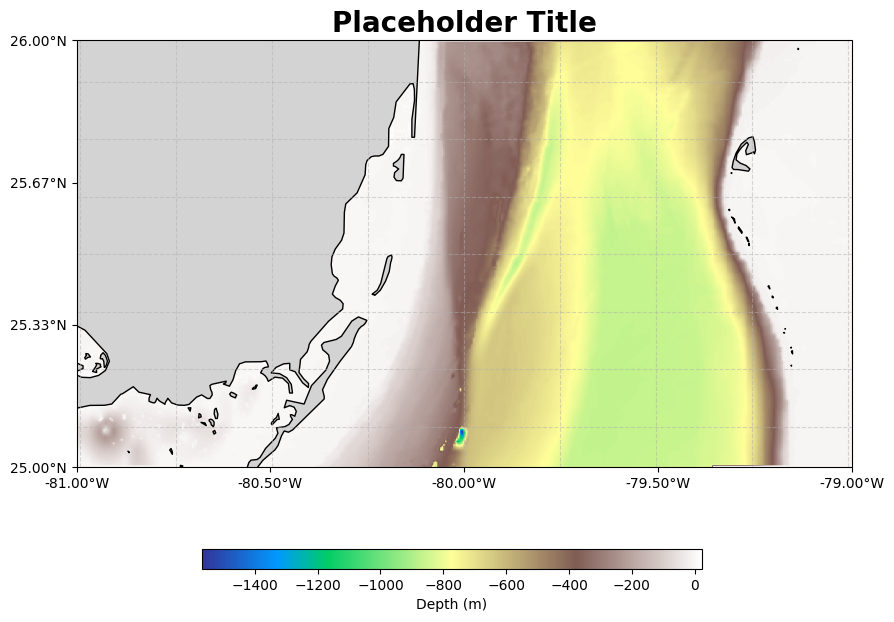

In [14]:
import matplotlib.pyplot as plt
import rasterio
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np

from rasterio.warp import calculate_default_transform, reproject, Resampling

# Open the GEBCO data - REPLACE THE FILENAME BELOW WITH YOUR FILENAME!
with rasterio.open('gebco_2023_n26.0_s25.0_w-81.0_e-79.0.tif') as src:
    bathymetry = src.read(1)
    raster_crs = src.crs
    extent = [src.bounds[0], src.bounds[2], src.bounds[1], src.bounds[3]]

# Approximate center of the region
mean_lon = (extent[0] + extent[1]) / 2
mean_lat = (extent[2] + extent[3]) / 2

# Set up a Transverse Mercator CRS centered on the region
projection = ccrs.TransverseMercator(central_longitude=mean_lon, central_latitude=mean_lat)

# Reproject the bathymetry data to the Transverse Mercator CRS
transform, width, height = calculate_default_transform(raster_crs, projection.proj4_params, src.width, src.height, *src.bounds)
bathymetry_reprojected = np.empty((height, width), dtype=bathymetry.dtype)
reproject(
    source=bathymetry,
    destination=bathymetry_reprojected,
    src_transform=src.transform,
    src_crs=src.crs,
    dst_transform=transform,
    dst_crs=projection.proj4_params,
    resampling=Resampling.bilinear
)

# Calculate the extent of the reprojected data
new_left = transform[2]
new_right = transform[2] + transform[0] * width
new_bottom = transform[5] + transform[4] * height
new_top = transform[5]
new_extent = [new_left, new_right, new_bottom, new_top]

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': projection})

# Adjust colormap and provide vmin and vmax for better color representation
img = ax.imshow(bathymetry_reprojected, cmap='terrain', extent=new_extent, vmin=bathymetry_reprojected.min(), vmax=bathymetry_reprojected.max(), transform=projection)

# Add land mask
ax.add_feature(cfeature.LAND, edgecolor='black', facecolor='lightgray', zorder=2)

# Add gridlines without labels
ax.gridlines(crs=projection, linestyle='--', alpha=0.5)

# Set the plot extent to match the reprojected raster's extent
ax.set_extent(new_extent, crs=projection)

# Position the colorbar closer to the x-axis label to minimize whitespace
cbar_ax = fig.add_axes([0.25, 0.18, 0.5, 0.02])
fig.colorbar(img, cax=cbar_ax, orientation='horizontal', label='Depth (m)')

# Ticks for longitude and latitude based on the original bathymetry data extent
delta_lon = 0.5  # Adjust as needed
delta_lat = 0.5  # Adjust as needed
lon_ticks = np.arange(extent[0], extent[1]+delta_lon, delta_lon)
lat_ticks = np.arange(extent[2], extent[3]+delta_lat, delta_lat)

# Create an inverse projection function from the map projection to geodetic
projection_to_geodetic = projection.as_geodetic()

# Calculate projected tick locations on the map projection
x_ticks_projected = np.linspace(new_extent[0], new_extent[1], len(lon_ticks))
y_ticks_projected = np.linspace(new_extent[2], new_extent[3], len(lat_ticks))

# Convert these tick locations back to geodetic (lat/lon) for labeling
lon_labels_projected = [projection_to_geodetic.transform_point(x, 0, projection)[0] for x in x_ticks_projected]
lat_labels_projected = [projection_to_geodetic.transform_point(0, y, projection)[1] for y in y_ticks_projected]

# Prepare labels for these tick locations
lon_labels = [f"{lon:.2f}°W" if lon < 0 else f"{lon:.2f}°E" for lon in lon_labels_projected]
lat_labels = [f"{lat:.2f}°S" if lat < 0 else f"{lat:.2f}°N" for lat in lat_labels_projected]

# Set the ticks and labels
ax.set_xticks(x_ticks_projected, crs=projection)
ax.set_yticks(y_ticks_projected, crs=projection)
ax.set_xticklabels(lon_labels)
ax.set_yticklabels(lat_labels)

# Add a title
ax.set_title("Placeholder Title", fontsize=20, fontweight='bold', loc='center')


plt.show()


## Replace the "Placeholder Title"

Replace the 'Placeholder Title' in the previous code with an appropriate title for your final project figure. I suggest using the topic and area that Prof. Pettijohn included in the tables for groups, in which final project topics+areas were included based on students' choices.

## Saving the Figure to Google Colab Workspace

In the following section of the Python code, we will save the generated map figure to a file within your Google Colab workspace. This file can be downloaded to your local system afterwards. Once downloaded, you may upload it to Canvas as part of your assignment submission.


In [15]:
import datetime

# Prompt the user for personal information
first_name = input("Enter your first name: ")
last_name = input("Enter your last name: ")
netID = input("Enter your netID: ")

# Create a timestamp
timestamp = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

# Construct the filename with the personal information and timestamp
filename = f"{first_name}_{last_name}_{netID}_map_{timestamp}.png"

# Save the figure with this filename
fig.savefig(filename, dpi=300, bbox_inches='tight')

# Inform the user of the file name
print(f"Figure saved as: {filename}")


Enter your first name: Shubh
Enter your last name: Goyal
Enter your netID: shubh3
Figure saved as: Shubh_Goyal_shubh3_map_20231212-182502.png


## Downloading the File for Submission

To download the saved figure with your personal information and timestamp to your local system, follow these steps:

1. Navigate to the file browser in Google Colab.
2. Locate the file named after your details and timestamp (it will look something like `Justin_Pettijohn_jcpettij_map_20231104-154810.png`).
3. Right-click on the file and select "Download".
4. Save the file to your preferred location on your local system.
5. Upload the saved file to Canvas as part of your assignment.

Alternatively, you can use the code snippet provided in the previous cell to directly download the file from the Colab environment:


In [16]:
from google.colab import files
files.download(filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>